In [1]:
import pandas as pd
import numpy as np
import re
import time

pd.set_option('max.columns', 131)

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('raw_data_with_labels.csv')
df = df[df['y'].notnull()]
df.shape

(91, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 231
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        91 non-null     object 
 1   upload_date  91 non-null     object 
 2   view_count   91 non-null     float64
 3   y            91 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.6+ KB


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Changing _upload\_date_ to datetime type and _view\_count_ to integer

In [5]:
df.head()

,title,upload_date,view_count,y
0,Google Cloud Products and Professional Machine...,2021-01-30,520.0,0.0
1,2021-01-30 - #ONPASSIVE​ BLOG VIDEO - How Can ...,2021-01-30,1.0,1.0
2,Machine Learning by Peter Mikheyev,2021-01-30,21.0,0.0
3,RTX 3090 for Machine Learning?,2021-01-30,342.0,1.0
4,April 2020 - Advanced Machine Learning - Lectu...,2021-01-30,3.0,0.0


In [6]:
df['upload_date'] = pd.to_datetime(df['upload_date'], format='%Y-%m-%d')
df['view_count'] = df['view_count'].astype(int)
df_limpo = df.copy()
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 231
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        91 non-null     object        
 1   upload_date  91 non-null     datetime64[ns]
 2   view_count   91 non-null     int64         
 3   y            91 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.6+ KB


In [7]:
features = pd.DataFrame(index=df_limpo.index)
y = df['y'].copy()

In [8]:
features['tempo_desde_pub'] = (pd.to_datetime('2021-01-31') - df_limpo['upload_date']) / np.timedelta64(1, 'D')
features['views'] = df_limpo['view_count']
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']
features = features.drop(['tempo_desde_pub'], axis=1)

<AxesSubplot:>

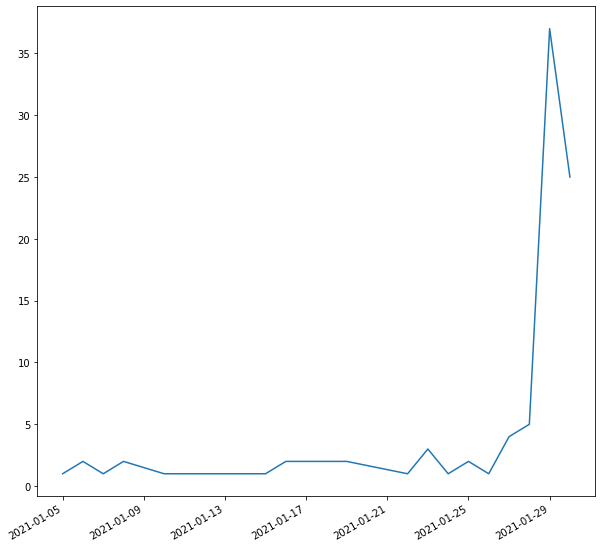

In [9]:
df_limpo['upload_date'].value_counts().plot(figsize=(10, 10))

In [10]:
Xtrain, Xval = features.iloc[:45], features.iloc[45:]
ytrain, yval = y.iloc[:45], y.iloc[45:]
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((45, 2), (46, 2), (45,), (46,))

In [11]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight='balanced')
mdl.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [12]:
p = mdl.predict_proba(Xval)[:, 1]

In [13]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [14]:
average_precision_score(yval, p)

0.38010962467484205

In [15]:
roc_auc_score(yval, p)

0.4781746031746032

In [16]:
from sklearn.tree import plot_tree

[Text(279.0, 453.0, 'views <= 2.5\ngini = 0.5\nsamples = 45\nvalue = [22.5, 22.5]'),
 Text(139.5, 271.8, 'views_por_dia <= 1.5\ngini = 0.28\nsamples = 8\nvalue = [1.607, 7.941]'),
 Text(69.75, 90.59999999999997, 'gini = 0.357\nsamples = 6\nvalue = [1.607, 5.294]'),
 Text(209.25, 90.59999999999997, 'gini = 0.0\nsamples = 2\nvalue = [0.0, 2.647]'),
 Text(418.5, 271.8, 'views <= 51.0\ngini = 0.484\nsamples = 37\nvalue = [20.893, 14.559]'),
 Text(348.75, 90.59999999999997, 'gini = 0.283\nsamples = 18\nvalue = [12.857, 2.647]'),
 Text(488.25, 90.59999999999997, 'gini = 0.481\nsamples = 19\nvalue = [8.036, 11.912]')]

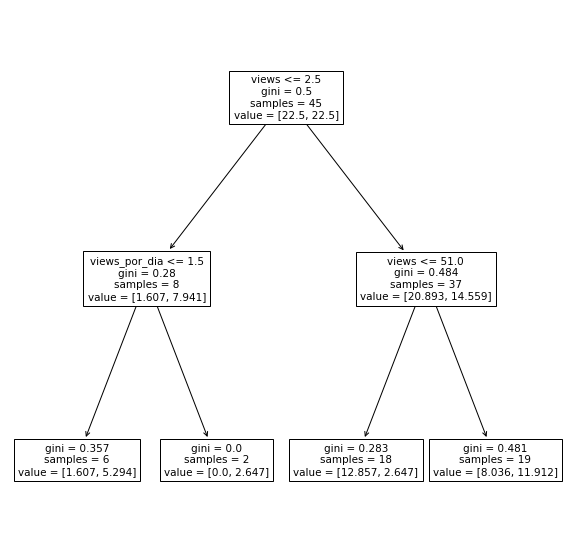

In [17]:
fig, ax = pylab.subplots(1, 1, figsize=(10, 10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)